<a href="https://colab.research.google.com/github/JHBaek0306/ImageProcess/blob/main/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


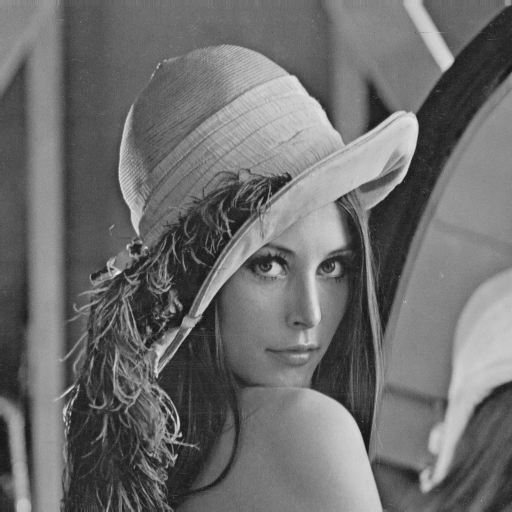

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
images = '/content/drive/MyDrive/Developement/Image/lena_grey.bmp'

img = cv2.imread(images, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

# Without OpenCV

Text(0.5, 1.0, 'OpenCV')

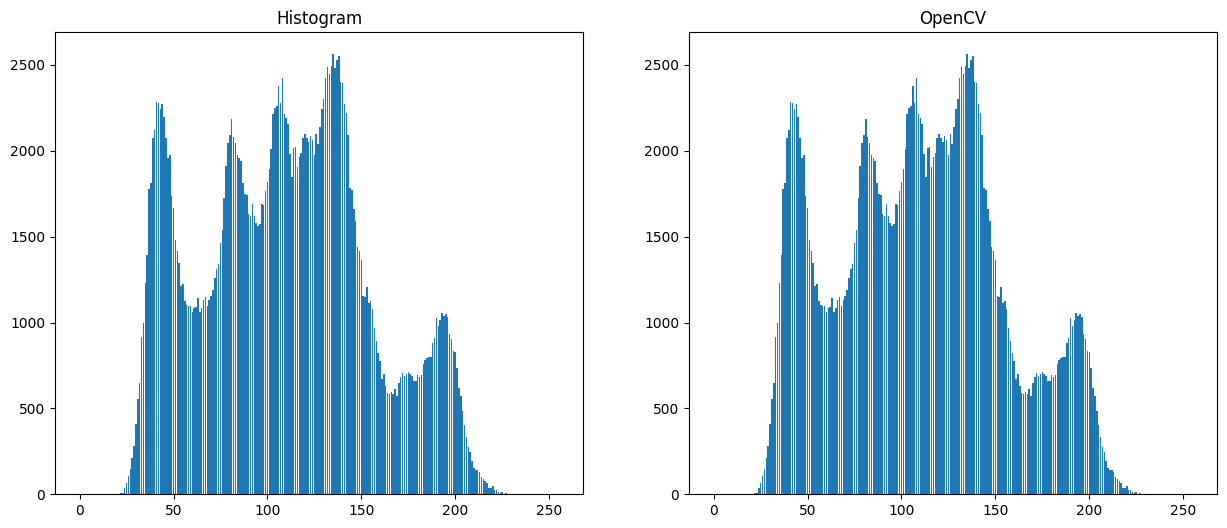

In [12]:
# initialize histogram array filled with 0
histo = np.zeros(shape=(256,), dtype=np.int64)

# get image's height and weight
h, w = img.shape

# Increase the corresponding histogram column by 1
for i in range(h):
    for j in range (w):
        histo[img[j, i]] = histo[img[j, i]] + 1


plt.figure(figsize=(15,6))
# Plot in bar
plt.subplot(1,2,1)
bins = np.arange(0, 256, 1)
plt.bar(bins, histo)
plt.title("Histogram")

# With Open CV
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.subplot(1,2,2)
plt.bar(bins, hist.ravel())
plt.title("OpenCV")

# Histogram Equalization

Text(0.5, 1.0, 'OpenCV')

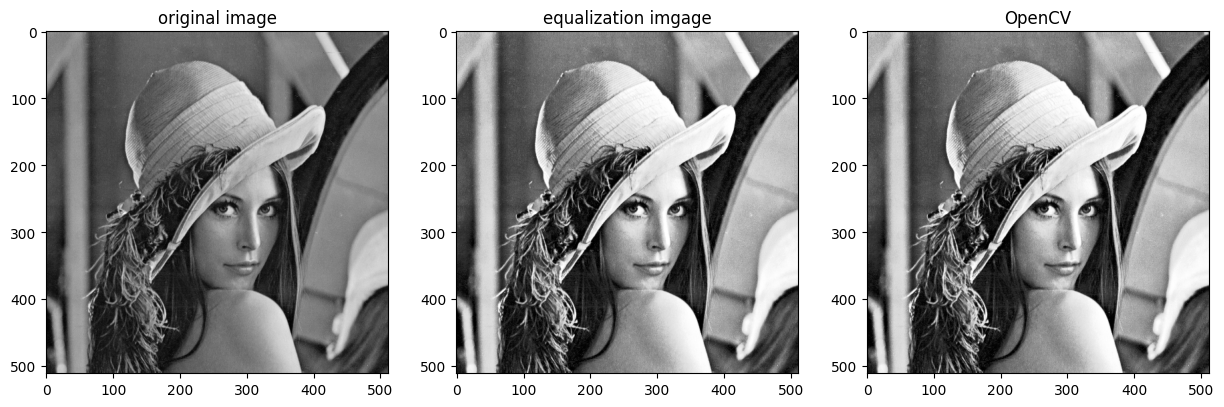

In [9]:
# Probability Density Function
quantization_hist = np.zeros(shape=(256,), dtype=np.float64)
for i in range(256):
    quantization_hist[i] = histo[i] / (h * w)

# Cumulative Distribution Function
cumulative = np.zeros((256,), dtype=np.float64)
for i in range(1, 256):
    cumulative[i] = cumulative[i - 1] + quantization_hist[i]

# Equalization Histogram Function
equalization_hist = np.zeros((256,), dtype=np.float64)
equalization_hist = np.round(cumulative * 255)

equalization_img = np.zeros(shape=(h, w), dtype=np.int64)
for i in range(h):
    for j in range(w):
        equalization_img[i, j] = equalization_hist[img[i, j]]

# Using OpenCV
cv2_equalization_img = cv2.equalizeHist(img)

# Print image
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("original image")

plt.subplot(1,3,2)
plt.imshow(equalization_img, cmap="gray")
plt.title("equalization imgage")

plt.subplot(1,3,3)
plt.imshow(cv2_equalization_img, cmap="gray")
plt.title("OpenCV")